In [1]:
import pandas as pd
import quandl

In [59]:
df = quandl.get("EOD/AAPL", authtoken="jX-65PpVLuzQHz3qvg3G")

In [4]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividend', 'Split',
       'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close', 'Adj_Volume'],
      dtype='object')

In [60]:
df  = df.loc[:,'Adj_Open':'Adj_Volume']

In [6]:
df

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,493.10,500.600,487.350,488.580,11854600.0,0.0,1.0,15.619650,15.857223,15.437510,15.476472,331928800.0
2013-09-04,499.56,502.240,496.280,498.691,12322600.0,0.0,1.0,15.824280,15.909173,15.720381,15.796753,345032800.0
2013-09-05,500.25,500.680,493.640,495.270,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0
2013-09-06,498.44,499.380,489.950,498.220,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0
2013-09-09,505.00,507.920,503.480,506.170,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,174.17,176.020,174.100,175.010,20949896.0,0.0,1.0,41.899570,42.344619,41.882730,42.101646,83799584.0
2017-12-22,174.68,175.424,174.500,175.010,16349444.0,0.0,1.0,42.022259,42.201241,41.978957,42.101646,65397776.0
2017-12-26,170.80,171.470,169.679,170.570,33185536.0,0.0,1.0,41.088858,41.250038,40.819183,41.033528,132742144.0


In [61]:
df['HL_PCT'] = (df['Adj_Open']-df['Adj_Low'])/df['Adj_Close']*100

In [62]:
df['PCT_change'] = (df['Adj_Close']-df['Adj_Open'])/df['Adj_Open']*100

In [63]:
df.corr()

,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Adj_Open,1.000000,0.999528,0.999416,0.998987,-0.549990,-0.046799,-0.018729
Adj_High,0.999528,1.000000,0.999278,0.999526,-0.544404,-0.056404,0.003561
Adj_Low,0.999416,0.999278,1.000000,0.999558,-0.560073,-0.080075,0.005597
Adj_Close,0.998987,0.999526,0.999558,1.000000,-0.553474,-0.080320,0.025237
Adj_Volume,-0.549990,-0.544404,-0.560073,-0.553474,1.000000,0.353000,-0.079556
HL_PCT,-0.046799,-0.056404,-0.080075,-0.080320,0.353000,1.000000,-0.742613
PCT_change,-0.018729,0.003561,0.005597,0.025237,-0.079556,-0.742613,1.000000


In [64]:
import matplotlib.pyplot as plt

In [65]:
import seaborn as sns

<AxesSubplot:>

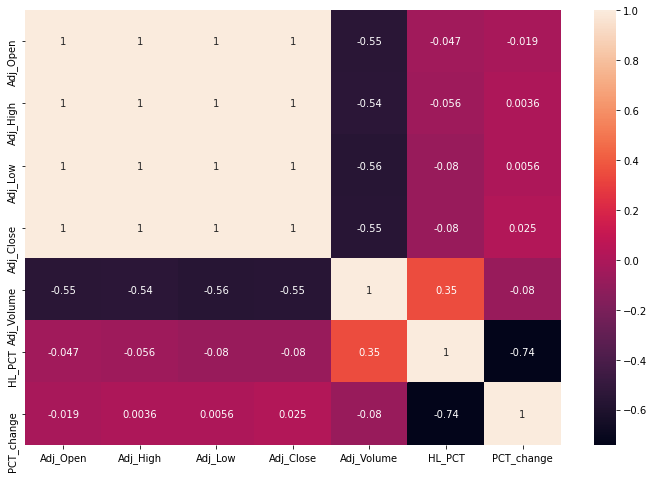

In [66]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [67]:
df = df[['Adj_Close','PCT_change','HL_PCT','Adj_Volume']]

In [16]:
df.isna().sum()

Adj_Close     0
PCT_change    0
HL_PCT        0
dtype: int64

In [17]:
df

,Adj_Close,PCT_change,HL_PCT
Date,,,
2013-09-03,15.476472,-0.916650,1.176880
2013-09-04,15.796753,-0.173953,0.657722
2013-09-05,15.688388,-0.995502,1.334626
2013-09-06,15.781833,-0.044138,1.704066
2013-09-09,16.033661,0.231683,0.300294
...,...,...,...
2017-12-21,42.101646,0.482287,0.039998
2017-12-22,42.101646,0.188917,0.102851
2017-12-26,41.033528,-0.134660,0.657208


In [68]:
df['scaled_adj_close'].pct_change().plot()

KeyError: 'scaled_adj_close'

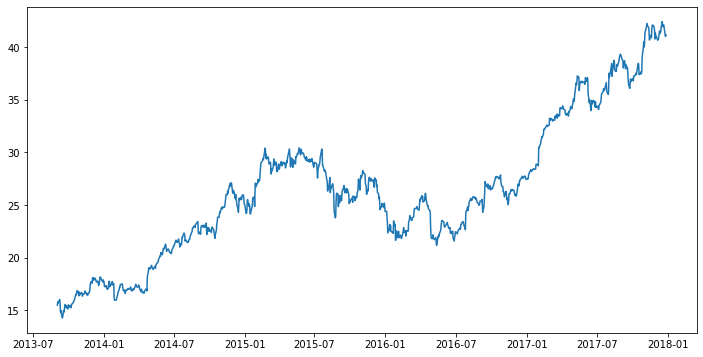

In [69]:
plt.figure(figsize=(12,6))
plt.plot('Adj_Close', data=df)

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler = MinMaxScaler(feature_range=(0,1))

In [72]:
import numpy as np

In [73]:
df['scaled_adj_close'] = scaler.fit_transform(np.array(df['Adj_Close']).reshape(-1,1))

In [75]:
df['scaled_PCT_change'] = scaler.fit_transform(np.array(df['PCT_change']).reshape(-1,1))
df['scaled_HL_PCT'] = scaler.fit_transform(np.array(df['HL_PCT']).reshape(-1,1))
df['scaled_adj_volume'] = scaler.fit_transform(np.array(df['Adj_Volume']).reshape(-1,1))

In [76]:
df.columns

Index(['Adj_Close', 'PCT_change', 'HL_PCT', 'Adj_Volume', 'scaled_adj_close',
       'scaled_PCT_change', 'scaled_HL_PCT', 'scaled_adj_volume'],
      dtype='object')

In [77]:
df = df.loc[:,'scaled_adj_close':'scaled_adj_volume']

In [78]:
X = df[['scaled_PCT_change','scaled_HL_PCT','scaled_adj_volume']]

In [79]:
y = df['scaled_adj_close']

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [90]:
y_train

Date
2015-01-27    0.375941
2016-03-14    0.341063
2017-10-12    0.820909
2014-08-28    0.316712
2016-02-23    0.276375
                ...   
2014-12-23    0.403414
2015-07-10    0.498249
2014-02-26    0.082450
2017-10-24    0.830265
2017-02-01    0.575615
Name: scaled_adj_close, Length: 763, dtype: float64

In [83]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [84]:
linreg = LinearRegression()

In [85]:
linreg.fit(X_train,y_train)

LinearRegression()

In [91]:
mean_squared_error(y_test,linreg.predict(X_test))

0.03781408685007755